In [23]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

In [17]:
#타이타닉 데이터를 회귀분석해서 종속변수를 예측하는데 종속변수를 나이에 두고 회귀분석 하자.

#[1단계] 데이터 로드 -> 데이터 프레임
df = sns.load_dataset('titanic')
pd.set_option('display.max_columns',15)

#[2단계] 결손값 확인 제거하거나 치환한다.
#2-1. 데이터 프레임의 자료형을 확인하고 10이하 여성은 child_woman 컬럼으로 대입 후 정수타입으로 지정

mask = (df.age < 10) | (df.sex == 'female')
df['child_woman'] = mask.astype(int)

#2-2 결측(NaN) 컬럼을 확인하자.
#2-3 deck, embark_town를 삭제
rdf = df.drop(['deck','embark_town'], axis = 1)

#2-4 age에 나이가 없는 행은 삭제하자.  dropna(대상 subset['컬럼명'], 조건 how)
# 데이터가 한개라도 없으면 drop 해라    (how = 'any')
# 데이터가 모두 없으면 drop 해라  (how = 'all')

rdf = rdf.dropna(subset = ['age'], how = 'any', axis = 0)

#2-5 embarked열의 NaN 값을 승선 도시 중 가장 많이 출현한 값 idxmax()으로 치환 fillna(채울값, inplace)
most_freg = rdf['embarked'].value_counts().idxmax()
rdf['embarked'].fillna(most_freg,inplace = True)

#[3단계] 범주형 데이터를 숫자형으로 변환하기
# 분석에 필요한 속성 선택

ndf = rdf[['survived', 'pclass','sex','age','sibsp','parch','embarked','child_woman']]

#범주형 데이터 숫자형 변환 (onehot) pd.get_dummies() sex, embarked
#범주형 데이터 숫자 변환 -> onehot 병합 -> 원래의 컬럼은 삭제한다.

gender = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf,gender],axis = 1)

emtown = pd.get_dummies(ndf['embarked'])
ndf = pd.concat([ndf,emtown],axis = 1)

#[4단계] 정규화 (독립변수(데이터))와 종속 변수(라벨)을 지정 -> 독립변수 정규화)
# 라벨, 종속변수 | 데이터, 독립변수
X = ndf[['survived', 'pclass','sibsp','parch','child_woman','female','male','C','Q','S']]  #독립변수
y = ndf['age']  #종속변수

# 독립변수 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)


#[5단계] 다중회귀분석 모형 - 
lr = LinearRegression() #모형 객체, 모델 선택

#학습
lr.fit(X,y)

y_hat = lr.predict(X)
print(y_hat)

#[6단계 시각화]


[27.02128892 31.82374931 22.17607959 34.28055127 29.4764912  44.03616515
  0.54530219 22.06007837 24.54391233 19.66287671 36.73575355 29.4764912
 26.73128587 25.88411281 29.45591657  2.67865748 23.42891054 36.75632817
 33.04829496 26.76463716 40.32813193 18.46050538 19.43087426 36.5545571
 41.57936318 36.75632817 39.12416091 41.58096288 29.4764912  20.97370826
 17.26407535 23.42891054 30.70874751 24.42791111 26.76463716 23.42891054
 -1.90990009 29.4764912  31.82374931 27.0007143  41.52136257 29.45591657
 27.01968923 26.88471307 17.0844786  27.01968923 36.73575355 41.58096288
  0.48730158 29.45591657 29.4764912  12.23926927 24.56608665 36.75632817
 13.49210022 36.75632817 24.56448695 25.76845798 29.4764912  11.42471216
 22.17607959 29.4764912  25.76845798 44.03616515 29.45591657 14.81047277
 26.84728709 29.2541455  29.4764912  29.4764912  29.4764912  41.58096288
 26.9052877  29.4764912  41.57936318 37.81332935 29.39791596 34.3011259
 25.88411281 43.97816454 29.4764912  24.56608665 29.47

In [32]:
#2 타이타닉 데이터를 회귀분석해서  나이의 결측값을 중간값으로 지정하고 생존률을 종속변수로 지정한 후
# K-NN 모델의 정확도를 확인 해보자

#[1단계] 데이터 로드 -> 데이터 프레임
df = sns.load_dataset('titanic')
pd.set_option('display.max_columns',15)

#[2단계] 결손값 확인 제거하거나 치환한다.
#2-1. 데이터 프레임의 자료형을 확인

#2-2 결측(NaN) 컬럼을 확인하자.

#2-3 deck, embark_town를 삭제
rdf = df.drop(['deck','embark_town'], axis = 1)


#2-4 age의 결손값을 중간값으로 대처하자. 
rdf['age'].fillna(rdf['age'].median(),inplace = True)

#2-5 embarked열의 NaN 값을 승선 도시 중 가장 많이 출현한 값 idxmax()으로 치환 fillna(채울값, inplace)
most_freg = rdf['embarked'].value_counts().idxmax()
rdf['embarked'].fillna(most_freg,inplace = True)

#[3단계] 범주형 데이터를 숫자형으로 변환하기
# 분석에 필요한 속성 선택

ndf = rdf[['survived', 'pclass','sex','age','sibsp','parch','embarked']]

#범주형 데이터 숫자형 변환 (onehot) pd.get_dummies() sex, embarked
#범주형 데이터 숫자 변환 -> onehot 병합 -> 원래의 컬럼은 삭제한다.

gender = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf,gender],axis = 1)

emtown = pd.get_dummies(ndf['embarked'],prefix = 'town')
ndf = pd.concat([ndf,emtown],axis = 1)

ndf.drop(['sex','embarked'],axis = 1, inplace = True)

#[4단계] 정규화 (독립변수(데이터))와 종속 변수(라벨)을 지정 -> 독립변수 정규화)
# 라벨, 종속변수 | 데이터, 독립변수
X = ndf[[ 'pclass','sibsp','parch','age','female','male','town_C','town_Q','town_S']]# 독립변수  
y = ndf['survived' ] #종속변수

# 독립변수 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

#개수 확인
print('train 개수 : ', X_train.shape)
print('train 개수 : ', X_test.shape)

#[5단계] 모델링
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

#테스트 데이터에 대한 사망자와 생존자를 예측해 보자.
y_hat = knn.predict(X_test)

##[6단계] 모델 평가
knn_met = confusion_matrix(y_test,y_hat)  #이원화 작업, 교차표, 이원교차표
print(knn_met)

#정확도 확인 : 정답률
accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

train 개수 :  (623, 9)
train 개수 :  (268, 9)
[[153  21]
 [ 27  67]]
0.8208955223880597


In [35]:
import numpy as np
#ex) 평균이 30이고 표준편차가 5인 가우시안 정규분포를 따르는 모집을 백만개를 구성해 보자.
avg = 30
std = 5
N = 10000000
res = np.random.randn(N) * std + avg
print(res)

[32.65029046 29.25333317 28.04481659 ... 38.64553483 30.8983894
 21.80747583]


In [36]:
import numpy as np
#ex2) 서울시 초등학생 천만명의 키를 모집단을 구성하는데 평균키가 150.2
# 표준편차가 30인 모집단을 구성해 보자.
avg = 150.2
std = 30
N = 10000000
res = np.random.randn(N) * std + avg
print(res)

[164.81978397 115.11472833 110.18612125 ... 176.94248324 133.57810387
 140.43493139]


In [38]:
#ex3) ex02)의 모집단에서 100명을 표본으로 추출해서 100명의 평균키를
# 리스트 객체에[my_list]입력하는 작업을 10000번 수행하자.
#(my_list에 있는 10000개의 표본의 평균키가 입력된다.)
avg = 150.2
std = 30
N = 10000000
res = np.random.randn(N) * std + avg

my_list = []
for i in range(1,10001):
    result = np.random.choice(res,100).mean()
    my_list.append(result) # 평균 값을 10000 입력된다.
    
print(my_list)
print(len(my_list))

#초등학교 100만명의 키 모집단에서 표본을 100개를 추출해서 표본 평균을 10000개 모았다.


[149.39781433735516, 152.29989805449955, 155.2178571107646, 152.20378521528838, 150.52078611374014, 150.04469137583308, 152.12794172021754, 150.3838956342482, 149.96968551169806, 151.91819755195394, 144.6437385058431, 142.65106406798378, 150.86627631852915, 147.58993287715418, 142.9802718072988, 140.11368217412667, 151.23787705417385, 152.00815749793534, 149.40774722370375, 148.94274350631667, 153.34765853716632, 154.97174273731576, 145.39166379157177, 150.62013546800273, 150.9725547376324, 148.22607528617, 153.31244201330625, 148.6017231605535, 149.48399226914785, 153.60728270452296, 154.14127163745124, 148.08272934290054, 152.91493800245615, 152.8280024117921, 145.157974775147, 146.30466017664446, 144.4894166766235, 148.98451235510774, 151.01094733564506, 150.22987647438302, 151.47728419675016, 149.81456829662923, 153.47600812960445, 150.95287546707507, 145.86962974231375, 154.289229692739, 153.16660213369866, 151.32823844644463, 150.02369690790954, 154.9691116817324, 150.01088488962

[0.00041912 0.0004196  0.00042007 ... 0.00067399 0.00067326 0.00067253]


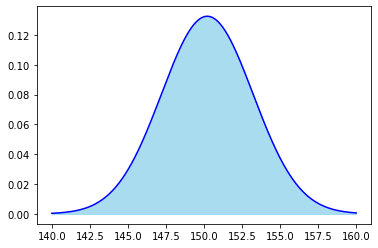

In [42]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
#ex4) ex02)의 모집단에서 100명을 표본으로 추출해서 100명의 평균키를
# 리스트 객체에[my_list]입력하는 작업을 10000번 수행하자.
#(my_list에 있는 10000개의 표본의 평균키가 입력된다.)
#조건 2. 확률 밀도 함수를 그려라
#조건 3. 
avg = 150.2
std = 30
N = 10000000
res = np.random.randn(N) * std + avg

my_list = []
for i in range(1,10001):
    result = np.random.choice(res,100).mean()
    my_list.append(result) # 평균 값을 10000 입력된다.

x = np.arange(140,160,0.001) #140~160 까지의 0.001의 간격으로 숫자 생성
y = norm.pdf(x,np.mean(my_list), np.std(my_list))
#norm.pdf(데이터, 평균, 표준편차)

print(y)  # 초등학생 키의 표본 평균값들에 대한 확률 밀도 함수 값이 출력
plt.plot(x,y,color = 'blue')

#그래프의 아래영역을 색깔로 채워라
plt.fill_between(x,y,interpolate = True, color = 'skyblue', alpha = 0.7)


In [46]:
#ex05) 동전을 10번 던져서 앞면이 2번 나올 확률을 출력하자. (동전을 10번 작업을 10000번 수행하자)
import random
coin = ['앞면', '뒷면']
cnt = 0
a = []

for k in range(1,10001):
    a = []
    for i in range(1,11):
        result = random.choice(coin)
        a.append(result)
    
    if a.count('앞면')  == 2:
        cnt = cnt + 1
        
print(cnt/10000)  #확률

0.0455


In [47]:
#ex06) 주사위 2개를 동시에 던져서 두 주사위의 합이 10이 나오는 확률을 출력하시오 (주사위 2개를 동시에 10000번 수행)
dice1 = list(range(1,7))
dice2 = list(range(1,7))
cnt = 0

for k in range(1,10001):
    result1 = random.choice(dice1)
    result2 = random.choice(dice2)
    
    if result1 + result2 == 10:
        cnt = cnt + 1
        
print(cnt/10000)

0.085


In [48]:
#ex07) 주머니에서 임의의 공을 뽑았을때 그공이 파란색일 확률은 얼마인가?(공을 뽑는작업 10000번 수행)
box = ['red','blue','red','blue','blue']
cnt = 0

for k in range(1,10001):
    result1 = random.choice(box)
    
    if result1 == 'blue':
        cnt = cnt + 1
        
print(cnt/10000)


0.5992


In [49]:
from random import shuffle
#ex08) 파란공 70개와 빨간공 30개가 있는 주머니를 만들자.
a = ['blue'] * 70
b = ['red'] * 30
box = a+b
len(box) #요소 확인

#무작위로 섞자
shuffle(box)

print(box)

#box에서 공 3개 추출했을 때 그 공 3개가 다 파란색일 확률은 ? 단 10000번 수행 할 경우
cnt = 0

for k in range(1,10001):
    result1 = random.choice(box)
    result2 = random.choice(box)
    result3 = random.choice(box)
    
    if result1 == 'blue' and result2 == 'blue' and result3 == 'blue':
        cnt = cnt + 1
        
print(cnt/10000)


['red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue']
0.3364


In [50]:
from random import shuffle
#ex08) 파란공 70개와 빨간공 30개가 있는 주머니를 만들자.
a = ['blue'] * 70
b = ['red'] * 30
box = a+b
len(box) #요소 확인

#무작위로 섞자
shuffle(box)

print(box)

#box에서 공 3개 추출했을 때 그 공 3개가 다 파란색일 확률은 ? 단 10000번 수행 할 경우
cnt = 0

for k in range(1,10001):
    result = random.sample(box,3) #box에서 공 3개 추출했을 때
    
    if result.count('blue') == 3:
        cnt = cnt + 1
        
print(cnt/10000)


['blue', 'red', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']
0.3377


1) 복원추출법(sampling with replacement : SWR)
  - 추출된 것을 되돌려 넣고 추출하는 방법
  - 복원추출법은 같은 표본이 중복해서 나올 수 있다.
  
2) 비복원추출법(sampling without replacement : SWOR)
  - 추출된 것을 되돌려 넣지 않고 추출하는 방법
  - 비복원추출법으로 한번 추출된 것ㅇㄴ 다시 추출되지않는다.

In [51]:
from random import shuffle
#ex09) box에서 공을 3개를 뽑았을때 그 중 2개가 blue 일 확률
# 비복원 추출, 공을 뽀는 작업 10000번
a = ['blue'] * 70
b = ['red'] * 30
box = a+b

#무작위로 섞자
shuffle(box)


#box에서 공 3개 추출했을 때 그 공 3개가 다 파란색일 확률은 ? 단 10000번 수행 할 경우
cnt = 0

for k in range(1,10001):
    result = random.sample(box,3) #box에서 공 3개 추출했을 때
    
    if result.count('blue') == 2:
        cnt = cnt + 1
        
print(cnt/10000)

#random 패키지의 sample 함수는 비복원 추출

0.4439


In [56]:
#ex10) 복원추출로 수행
blue = ['blue'] * 70
red = ['red'] * 30
box = blue + red

#무작위로 섞자
shuffle(box)


#box에서 공 3개 추출했을 때 그 공 3개가 다 파란색일 확률은 ? 단 10000번 수행 할 경우
cnt = 0

for k in range(1,10001):
    res = []
    for i in range(3):
        res.append(random.choice(box)) #box에서 공 3개 추출했을 때
    
    if res.count('red') == 1:
        cnt = cnt + 1
        
print(cnt/10000)

#random 패키지의 sample 함수는 비복원 추출

0.437


In [57]:
from random import shuffle
#ex11) 복원추출로 수행
a = ['blue'] * 70
b = ['red'] * 30
box = a+b

#무작위로 섞자
shuffle(box)

#box에서 공 3개 추출했을 때 그 공 3개가 다 파란색일 확률은 ? 단 10000번 수행 할 경우
cnt = 0
cnts = 0

for k in range(1,10001):
    result = list(np.random.choice(box,3,replace = True))  #replace = True 면 복원
    cnts += 1
    if result.count('blue') == 2:
        cnt += 1
        
print(cnt/10000)

#random 패키지의 sample 함수는 비복원 추출

0.445


In [58]:
#ex12) 6개의 제품이 들어있는 상자가 있다. 그 중에 2개가 불량품이라고 했을때
#제품검사를 위해서 3개를 추출했을때 1개가 불량품일 확률은 얼마일까? (복원추출)

box = ['정상',',불량품','정상','정상','불량품','정상']

shuffle(box)

cnt = 0
cnts = 0

for k in range(1,10001):
    result = list(np.random.choice(box,3,replace = True))  #replace = True 면 복원
    cnts += 1
    if result.count('불량품') == 1:
        cnt += 1
        
print(cnt/10000)

0.3397


로지스틱 회귀는 대수 확률을 설명 변수 $x_i$ 선형 합으로 표현한다
예측하고자하는 (양 사건)의 확률을 $p$할 때 확률은  $p / ( 1 - p )$ 라고 쓰고 사건의 발생을 나타낸다
확률의 로그를 취한 것이 대수 확률이다. 
$$
    \log(\frac{p}{1-p}) = w_0x_0 + w_1x_1 + \cdots +w_mx_m = \sum^m_{i=0}w_ix_i
$$
여기서 가중치$w_0$은 , $x_0=1$로 절편을 나타낸다.
로지스틱 회귀는 대수 확률과 여러 설명 변수의 관계를 나타내는 $w_i$  를 학습하는 것이 목적이다.
설명변수의 값이 있을 경우 긍적적사고의 확률 p 이다 위의식을 좌변이 pfh한다면 아래와 같다.
$$
    \frac{1}{1+\exp(-\sum^m_{i=0}w_ix_i)}
$$

분류를 위한 알고리즘(ex : 전자제품 고장날 확률 or 고장날 확률)
단 설명변수와 데이터가 있는 공간의 선형분리가 가능한 경우만 성능이 높다.


In [60]:
#exam13) 꽃잎의 길이가 (petal_length)에 의해 품종을 분류해보자.
# 품종(species)당 꽃받침(sepal) 조각과 꽃잎(petal)의 길이(length) 및 너비(width) 값과 품종의 관계를 알 수 있다.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
iris_df = sns.load_dataset('iris') #데이터셋 로드
iris_df = iris_df[(iris_df['species']=='versicolor') | (iris_df['species']=='virginica')] #편의상 두 품종으로
iris_df.head()
# sns.pairplot(iris_df, hue='species')

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [63]:
#꽃잎의 길이를 사용해서 품종을 분류 하자 _로지스틱 회귀 모델을 사용하자.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = iris_df[['petal_length']]  #설명 변수 = 꽃잎의 길이

    # versicolor 클래스 0, virginica를 클래스 1로
Y = iris_df['species'].map({'versicolor': 0, 'virginica' : 1})
    
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

lr = LogisticRegression() #로지스틱 회귀 모델의 인스턴스를 생성
lr.fit(X_train, Y_train)  #학습

print("coefficient = ", lr.coef_)  #계수
print("intercept = ", lr.intercept_)  #절편

#LogisticRegression(penalty,C)
# penalty = L1 정규화는 설명변수의 가중치가 0
#           L2 정규화 설명변수의 가중치가 커지는 것을 방지하도록 과도한 학습은 방지하자라는 뜻
# C : 정규화 강도를 지정하는파라미터(1.0)

coefficient =  [[3.43226939]]
intercept =  [-16.54483764]


In [64]:
from sklearn.metrics import *
Y_pred = lr.predict(X_test)
print(Y_pred)

#confusion matrix : 실제 클래스가 0,1의 데이터에 대한 클래스 0,1로 분류된 데이터의 개수를
#요소로 리턴하는 행렬
print('confusion matrix = \n', confusion_matrix(y_true = Y_test, y_pred = Y_pred))
print('accuracy = ', accuracy_score(y_true = Y_test, y_pred = Y_pred))
print('recall = ', recall_score(y_true = Y_test, y_pred = Y_pred))
print('f1 score = ', f1_score(y_true = Y_test, y_pred = Y_pred))


[0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0]
confusion matrix = 
 [[ 7  3]
 [ 0 10]]
accuracy =  0.85
recall =  1.0
f1 score =  0.8695652173913044


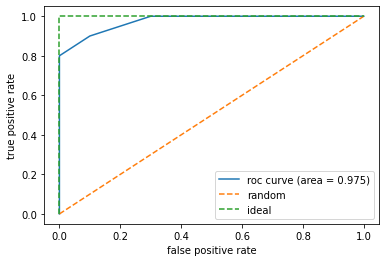

In [65]:
from sklearn.metrics import roc_curve, auc

Y_score = lr.predict_proba(X_test)[:,1]

#roc_curve : 곡선의 아래 면적으로 값이 클수록 분류 성분이 좋다.

fpr,tpr,thresholds = roc_curve(y_true = Y_test, y_score = Y_score)

plt.plot(fpr, tpr, label = 'roc curve (area = %0.3f)'% auc(fpr,tpr))
plt.plot([0,1],[0,1],linestyle = '--', label = 'random')
plt.plot([0,0,1],[0,1,1],linestyle = '--', label = 'ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [66]:
print('auc = ', roc_auc_score(y_true = Y_test, y_score = Y_score))
#auc는 클래스 1의 데이터에 대한 점수가 가장 큰 예측률이 되고 실제로 0 에 대한 데이터에 대한
#점수는 낮게 예측된다.

auc =  0.975


In [ ]:
#로지스틱 :
1. 데이터가 어떤 데이터에 속하는지 예측, 분류 (고객이 상품을 사거나 사지않을 경우의 유무)
2. 주목하고 있는 사건이 발생할 확률을 예측 (고객이 몇 %의 확률로 상품을 구매할 지 예측)

In [ ]:
#타이타닉 데이터를 가지고 로지스틱을 이용해서 분류해보자
#    2개  train의 데이터로 X, y
          test라는 데이터로 테스트
          로지스틱으로 분석 한 후 roc_auc_score점수 확인 시각화

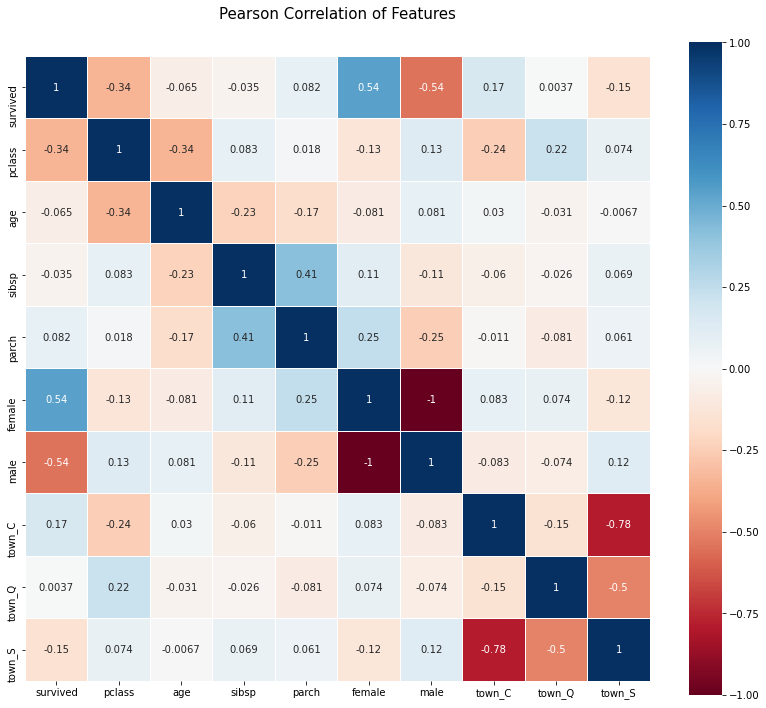

(891, 9) (891,)
(418, 9) (418,)
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
[[255  11]
 [ 15 137]]
0.937799043062201
coeffi

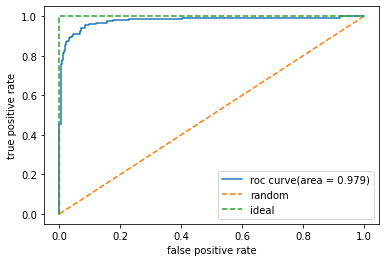

In [117]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

df = pd.read_csv('train.csv')
df_t = pd.read_csv('test.csv')
y_test = pd.read_csv('gender_submission.csv')

df.columns = map(str.lower, df.columns)
df_t.columns = map(str.lower, df_t.columns)
y_test.columns = map(str.lower, y_test.columns)

#[2단계] 결손값 확인 제거하거나 치환한다.
#2-1. 데이터 프레임의 자료형을 확인

#2-2 결측(NaN) 컬럼을 확인하자.

rdf = df
rdf_t = df_t

#2-4 age의 결손값을 중간값으로 대처하자. 
rdf['age'].fillna(df['age'].median(),inplace = True)
rdf_t['age'].fillna(df_t['age'].median(),inplace = True)

#2-5 embarked열의 NaN 값을 승선 도시 중 가장 많이 출현한 값 idxmax()으로 치환 fillna(채울값, inplace)
most_freg = rdf['embarked'].value_counts().idxmax()
rdf['embarked'].fillna(most_freg,inplace = True)

most_freg = rdf_t['embarked'].value_counts().idxmax()
rdf_t['embarked'].fillna(most_freg,inplace = True)

#[3단계] 범주형 데이터를 숫자형으로 변환하기
# 분석에 필요한 속성 선택

ndf = rdf[['survived', 'pclass','sex','age','sibsp','parch','embarked']]
ndf_t = rdf_t[['pclass','sex','age','sibsp','parch','embarked']]

#범주형 데이터 숫자형 변환 (onehot) pd.get_dummies() sex, embarked
#범주형 데이터 숫자 변환 -> onehot 병합 -> 원래의 컬럼은 삭제한다.

gender = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf,gender],axis = 1)

emtown = pd.get_dummies(ndf['embarked'],prefix = 'town')
ndf = pd.concat([ndf,emtown],axis = 1)

ndf.drop(['sex','embarked'],axis = 1, inplace = True)

#--------------------------------------------------------------------------

gender = pd.get_dummies(ndf_t['sex'])
ndf_t = pd.concat([ndf_t,gender],axis = 1)

emtown = pd.get_dummies(ndf_t['embarked'],prefix = 'town')
ndf_t = pd.concat([ndf_t,emtown],axis = 1)

ndf_t.drop(['sex','embarked'],axis = 1, inplace = True)

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(ndf.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

#[4단계] 정규화 (독립변수(데이터))와 종속 변수(라벨)을 지정 -> 독립변수 정규화)
# 라벨, 종속변수 | 데이터, 독립변수
X_train = ndf[[ 'pclass','sibsp','parch','age','female','male','town_C','town_Q','town_S']]# 독립변수  
y_train = ndf['survived' ] #종속변수
X_test = ndf_t[[ 'pclass','sibsp','parch','age','female','male','town_C','town_Q','town_S']]# 독립변수  
y_test = y_test['survived']

# 독립변수 정규화
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(type(y_train))
print(type(y_test))

# [5단계] 모델링
knn = LogisticRegression()
knn.fit(X_train, y_train)

# 테스트 데이터에 대한 사망자와 생존자를 예측해보자
y_hat = knn.predict(X_test)
print(y_hat)

# [6단계] 모델 평가
knn_met = confusion_matrix(y_test, y_hat) # 이원화 작업, 교차표, 이원교차표
print(knn_met)

# 정확도 확인 : 정답률
accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

print("coeffiecient = ", knn.coef_) # 계수 2*X + 3 = 7 에서 2가 계수
print("intercept = ", knn.intercept_) # 절편

print('confusion matrix = \n', confusion_matrix(y_true = y_test, y_pred = y_hat))
print('accuracy = ', accuracy_score(y_true = y_test, y_pred = y_hat))
print('precision = ', precision_score(y_true = y_test, y_pred = y_hat))
print('recall = ', recall_score(y_true = y_test, y_pred = y_hat))
print('f1 score = ', f1_score(y_true = y_test, y_pred = y_hat))

Y_score = knn.predict_proba(X_test)[:, 1]

# roc_curve : 곡선의 아래 면적으로 값이 클수록 분류 성분이 좋다.
# 가로(FPR), 세로(TPR)
fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = Y_score)

plt.plot(fpr, tpr, label = 'roc curve(area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle = '--', label = 'ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()



In [ ]:
!pip install

In [107]:
import pandas as pd

df = pd.read_csv('train.csv')
df_t = pd.read_csv('test.csv')
y_test = pd.read_csv('gender_submission.csv')

df.columns = map(str.lower, df.columns)
df_t.columns = map(str.lower, df_t.columns)
y_test.columns = map(str.lower, y_test.columns)

#[2단계] 결손값 확인 제거하거나 치환한다.
#2-1. 데이터 프레임의 자료형을 확인

#2-2 결측(NaN) 컬럼을 확인하자.

rdf = df
rdf_t = df_t

#2-4 age의 결손값을 중간값으로 대처하자. 
rdf['age'].fillna(df['age'].median(),inplace = True)
rdf_t['age'].fillna(df_t['age'].median(),inplace = True)

#2-5 embarked열의 NaN 값을 승선 도시 중 가장 많이 출현한 값 idxmax()으로 치환 fillna(채울값, inplace)
most_freg = rdf['embarked'].value_counts().idxmax()
rdf['embarked'].fillna(most_freg,inplace = True)

most_freg = rdf_t['embarked'].value_counts().idxmax()
rdf_t['embarked'].fillna(most_freg,inplace = True)

#[3단계] 범주형 데이터를 숫자형으로 변환하기
# 분석에 필요한 속성 선택

ndf = rdf[['survived','sex','age','sibsp','parch','embarked']]
ndf_t = rdf_t[['sex','age','sibsp','parch','embarked']]

#범주형 데이터 숫자형 변환 (onehot) pd.get_dummies() sex, embarked
#범주형 데이터 숫자 변환 -> onehot 병합 -> 원래의 컬럼은 삭제한다.

gender = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf,gender],axis = 1)

emtown = pd.get_dummies(ndf['embarked'],prefix = 'town')
ndf = pd.concat([ndf,emtown],axis = 1)

ndf.drop(['sex','embarked'],axis = 1, inplace = True)

#--------------------------------------------------------------------------

gender = pd.get_dummies(ndf_t['sex'])
ndf_t = pd.concat([ndf_t,gender],axis = 1)

emtown = pd.get_dummies(ndf_t['embarked'],prefix = 'town')
ndf_t = pd.concat([ndf_t,emtown],axis = 1)

ndf_t.drop(['sex','embarked'],axis = 1, inplace = True)

#[4단계] 정규화 (독립변수(데이터))와 종속 변수(라벨)을 지정 -> 독립변수 정규화)
# 라벨, 종속변수 | 데이터, 독립변수
X_train = ndf[['sibsp','parch','female','male','town_C','town_Q','town_S']]# 독립변수  
y_train = ndf['survived' ] #종속변수
X_test = ndf_t[['sibsp','parch','female','male','town_C','town_Q','town_S']]# 독립변수  
y_test = y_test['survived']

# 독립변수 정규화
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(type(y_train))
print(type(y_test))

asd = pd.concat([ndf[['sibsp']],y_train],axis = 1)

print(asd)

(891, 7) (891,)
(418, 7) (418,)
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
     sibsp  survived
0        1         0
1        1         1
2        0         1
3        1         1
4        0         0
..     ...       ...
886      0         0
887      0         1
888      1         0
889      0         1
890      0         0

[891 rows x 2 columns]


train data 개수 :  (623, 4)
test data 개수 :  (268, 4)
[0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1]
[[149  19]
 [ 55  45]]
0.7238805970149254
coeffiecient =  [[-0.8740263  -0.25151531  0.17828311 -0.4874974 ]]
intercept =  [-0.5295829]
confusion matrix = 
 [[149  19]
 [ 55  45]]
accuracy =  0.7238805970149254
precision =  0.703125
recall =  0.45
f1 score =  0.5487804878048781


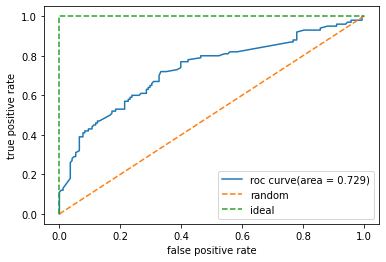

In [87]:
#타이타닉 데이터를 가지고 로지스틱을 이용해서 분류해보자
#    2개  train의 데이터로 X, y
#          test라는 데이터로 테스트
#          로지스틱으로 분석 한 후 roc_auc_score점수 확인 시각

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


df = pd.read_csv('train.csv')
pd.set_option('display.max_columns',15)

#[2단계 ] 결손값 확인 제거하거나 치환한다.  
#2-1.  데이터 프레임의 자료형을 확인하자 
#2-2  결측(NaN) 컬럼을 확인하자.  

#2-4 age의 결손값을 중간값으로 대처하자.  
df['Age'].fillna(df['Age'].median(), inplace = True)

#2-5 embarked열의 NaN 값을 승선 도시중 가장 많이 출현한 값 idxmax()으로 치환  fillna(채울값 ,inplace) 하자.  

most_freg = df['Embarked'].value_counts().idxmax()
df['Embarked'].fillna(most_freg,inplace= True)

#[3단계] 범주형 데이터를 숫자형으로 변환하기   
# 분석에 필요한 속성 선택
ndf =df[['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked']]

#범주형 데이터 숫자형 변환 (onehot)  pd.get_dummies()   sex , embarked 
# 범주형 데이터 숫자 변환 ->  onehot 병합 ->  원래의 컬럼은 삭제한다.  
gender = pd.get_dummies(ndf['Sex'])
ndf = pd.concat([ndf,gender],axis=1)
res = pd.get_dummies(ndf['Embarked'],prefix='town')
ndf = pd.concat([ndf,res],axis=1)
ndf.drop(['Sex', 'Embarked'],axis =1, inplace = True)

#[4단계 ] 정규화  ( 독립변수(데이터)와  종속 변수(라벨) 를 지정  -> 독립변수 정규화  ) 
# 라벨,종속변수 | 데이터, 독립변수  
X = ndf[[ 'Pclass','SibSp','Parch','Age']]# 독립변수  
y = ndf['Survived' ] #종속변수 

# 독립변수 정규화  
X=preprocessing.StandardScaler().fit(X).transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# 개수 확인
print("train data 개수 : ", X_train.shape)
print('test data 개수 : ', X_test.shape)

# [5단계] 모델링
knn = LogisticRegression()
knn.fit(X_train, y_train)

# 테스트 데이터에 대한 사망자와 생존자를 예측해보자
y_hat = knn.predict(X_test)
print(y_hat)

# [6단계] 모델 평가
knn_met = confusion_matrix(y_test, y_hat) # 이원화 작업, 교차표, 이원교차표
print(knn_met)

# 정확도 확인 : 정답률
accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

print("coeffiecient = ", knn.coef_) # 계수 2*X + 3 = 7 에서 2가 계수
print("intercept = ", knn.intercept_) # 절편

print('confusion matrix = \n', confusion_matrix(y_true = y_test, y_pred = y_hat))
print('accuracy = ', accuracy_score(y_true = y_test, y_pred = y_hat))
print('precision = ', precision_score(y_true = y_test, y_pred = y_hat))
print('recall = ', recall_score(y_true = y_test, y_pred = y_hat))
print('f1 score = ', f1_score(y_true = y_test, y_pred = y_hat))

Y_score = knn.predict_proba(X_test)[:, 1]

# roc_curve : 곡선의 아래 면적으로 값이 클수록 분류 성분이 좋다.
# 가로(FPR), 세로(TPR)
fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = Y_score)

plt.plot(fpr, tpr, label = 'roc curve(area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle = '--', label = 'ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()